# Question 1

In [3]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [45]:
def compact_SVD(A, tol=1e-1):
    lamb, V = la.eig(A.conj().T @ A)
  
    sig = np.sqrt(lamb)

    sort_idx = np.argsort(sig)[::-1]
    sig = sig[sort_idx]
    V = V[:,sort_idx]
    
    r = len(sig[sig > tol])

    sigC = sig[:r]
    Vc = V[:,:r]
    
    U = A @ (Vc / sigC)
    return np.real(U), sigC, np.real(Vc.conj().T)

In [50]:
A = np.random.random((10,5)) # 1e-5*np.ones((10,5))

U, sigC, Vh = compact_SVD(A)
U1, s1, Vh1 = la.svd(A, full_matrices=False)

print('U orthonomal?',np.allclose(U.T @ U, np.eye(5)))
print('U sig Vh = A ? ', np.allclose(U @ np.diag(sigC) @ Vh, A))
print('Correct rank?', np.linalg.matrix_rank(A) == len(sigC))

U orthonomal? True
U sig Vh = A ?  True
Correct rank? True


# Question 2

In [232]:
def visualize(A):
    domain = np.linspace(0, 2*np.pi, 200)
    s = np.zeros((2,200))
    s[0,:] = [np.cos(theta) for theta in domain]
    s[1,:] = [np.sin(theta) for theta in domain]
    
    E = np.array(([1, 0, 0],[0, 0, 1]))
    U, sig, Vh = la.svd(A)
    
    fig, axes = plt.subplots(2,2, figsize=(10,10))
    
    axes[0,0].plot(s[0,:], s[1,:])
    axes[0,0].plot(E[0,:], E[1,:])
    axes[0,1].plot((Vh @s)[0,:], (Vh@s)[1,:])
    axes[0,1].plot((Vh @E)[0,:], (Vh@E)[1,:])
    axes[1,0].plot(((sig*np.eye(2))@Vh@s)[0,:],(sig*np.eye(2)@Vh@s)[1,:])
    axes[1,0].plot(((sig*np.eye(2))@Vh@E)[0,:],(sig*np.eye(2)@Vh@E)[1,:])
    axes[1,1].plot(((U@sig*np.eye(2))@Vh@s)[0,:],(U@(sig*np.eye(2))@Vh@s)[1,:])
    axes[1,1].plot((U@(sig*np.eye(2))@Vh@E)[0,:],(U@(sig*np.eye(2))@Vh@E)[1,:])
       

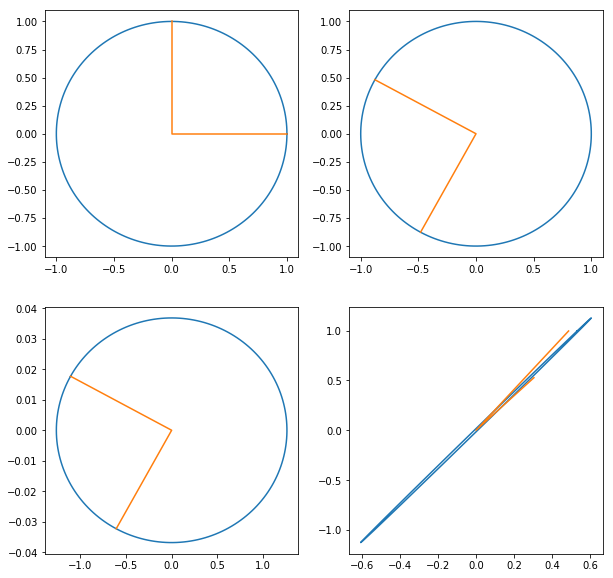

In [233]:
A = np.random.random((2,2))
visualize(A)

# Question 3

In [338]:
def compressed_svd(A, s):
    U, sig, Vh = la.svd(A)
    
    if s > np.linalg.matrix_rank(A):
        raise ValueError('s is larger than rank(A)')
    
    U = U[:,:s]

    sig = sig[0:s]
    Vh = Vh[:s, :]
    
    size = U.size + sig.size + Vh.size
    
    return U, sig, Vh, size
    

In [339]:
A = np.random.random((20,20))
a,b,c,d = compressed_svd(A,s=5)
d

205

# Question 4 (incomplete)

In [378]:
def prob4(A, tol=1):
    
    U, sig, Vh = la.svd(A, full_matrices=False)
    idx = np.argmax(sig < tol)
    
    if idx > np.linalg.matrix_rank(A):
        raise ValueError('Tol demands s larger than rank(A)')

    sig = np.diag(sig)
    
    U = U[:,:idx]
    sig = sig[:idx,:idx]
    Vh = Vh[:idx,:]
    
    reduced = U @ sig @ Vh
    return idx
        

In [355]:
A = np.random.random((30,30))
prob4(A)

19

# Question 5 (incomplete)

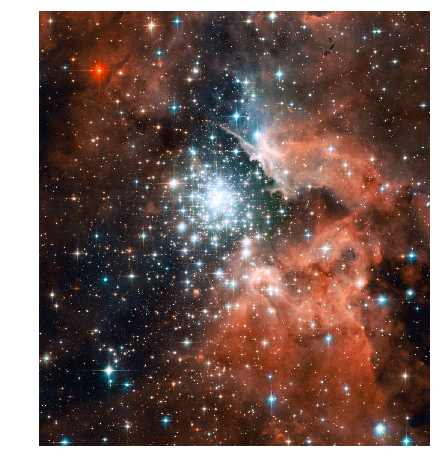

In [374]:
image_color = plt.imread('hubble.jpg') / 255.

fig = plt.subplots(1,1, figsize=(10,8) )
plt.imshow(image_color, cmap='gray')
plt.axis('off')
plt.show()

In [376]:
def image_compress(file='hubble.jpg'):
    image = plt.imread('hubble.jpg') / 255.
    
    prob4(image)
    
    return image

In [377]:
image_compress()

array([[[0.47843137, 0.20392157, 0.15686275],
        [0.48235294, 0.20784314, 0.16078431],
        [0.48627451, 0.21176471, 0.16470588],
        ...,
        [0.2627451 , 0.16862745, 0.12941176],
        [0.2627451 , 0.16862745, 0.12941176],
        [0.32156863, 0.18823529, 0.14901961]],

       [[0.49411765, 0.21176471, 0.16470588],
        [0.49019608, 0.21568627, 0.16862745],
        [0.49411765, 0.22352941, 0.16470588],
        ...,
        [0.25490196, 0.16078431, 0.12156863],
        [0.25490196, 0.16078431, 0.12156863],
        [0.29019608, 0.16470588, 0.12156863]],

       [[0.49411765, 0.21176471, 0.15686275],
        [0.49803922, 0.21568627, 0.16078431],
        [0.50196078, 0.21960784, 0.16470588],
        ...,
        [0.24705882, 0.15294118, 0.11372549],
        [0.24705882, 0.15294118, 0.11372549],
        [0.27058824, 0.15294118, 0.11372549]],

       ...,

       [[0.07843137, 0.07058824, 0.08235294],
        [0.08235294, 0.0627451 , 0.07843137],
        [0.08235294, 0